In [1]:
# Exploratory data analysis
import warnings  
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from IPython.display import display

from sklearn.svm import OneClassSVM
from numpy import where
from pathlib import Path

In [2]:
# Import training data
data_folder = Path("data-sets")
train = pd.read_csv("data-sets/train.csv")
test = pd.read_csv("data-sets/test.csv")


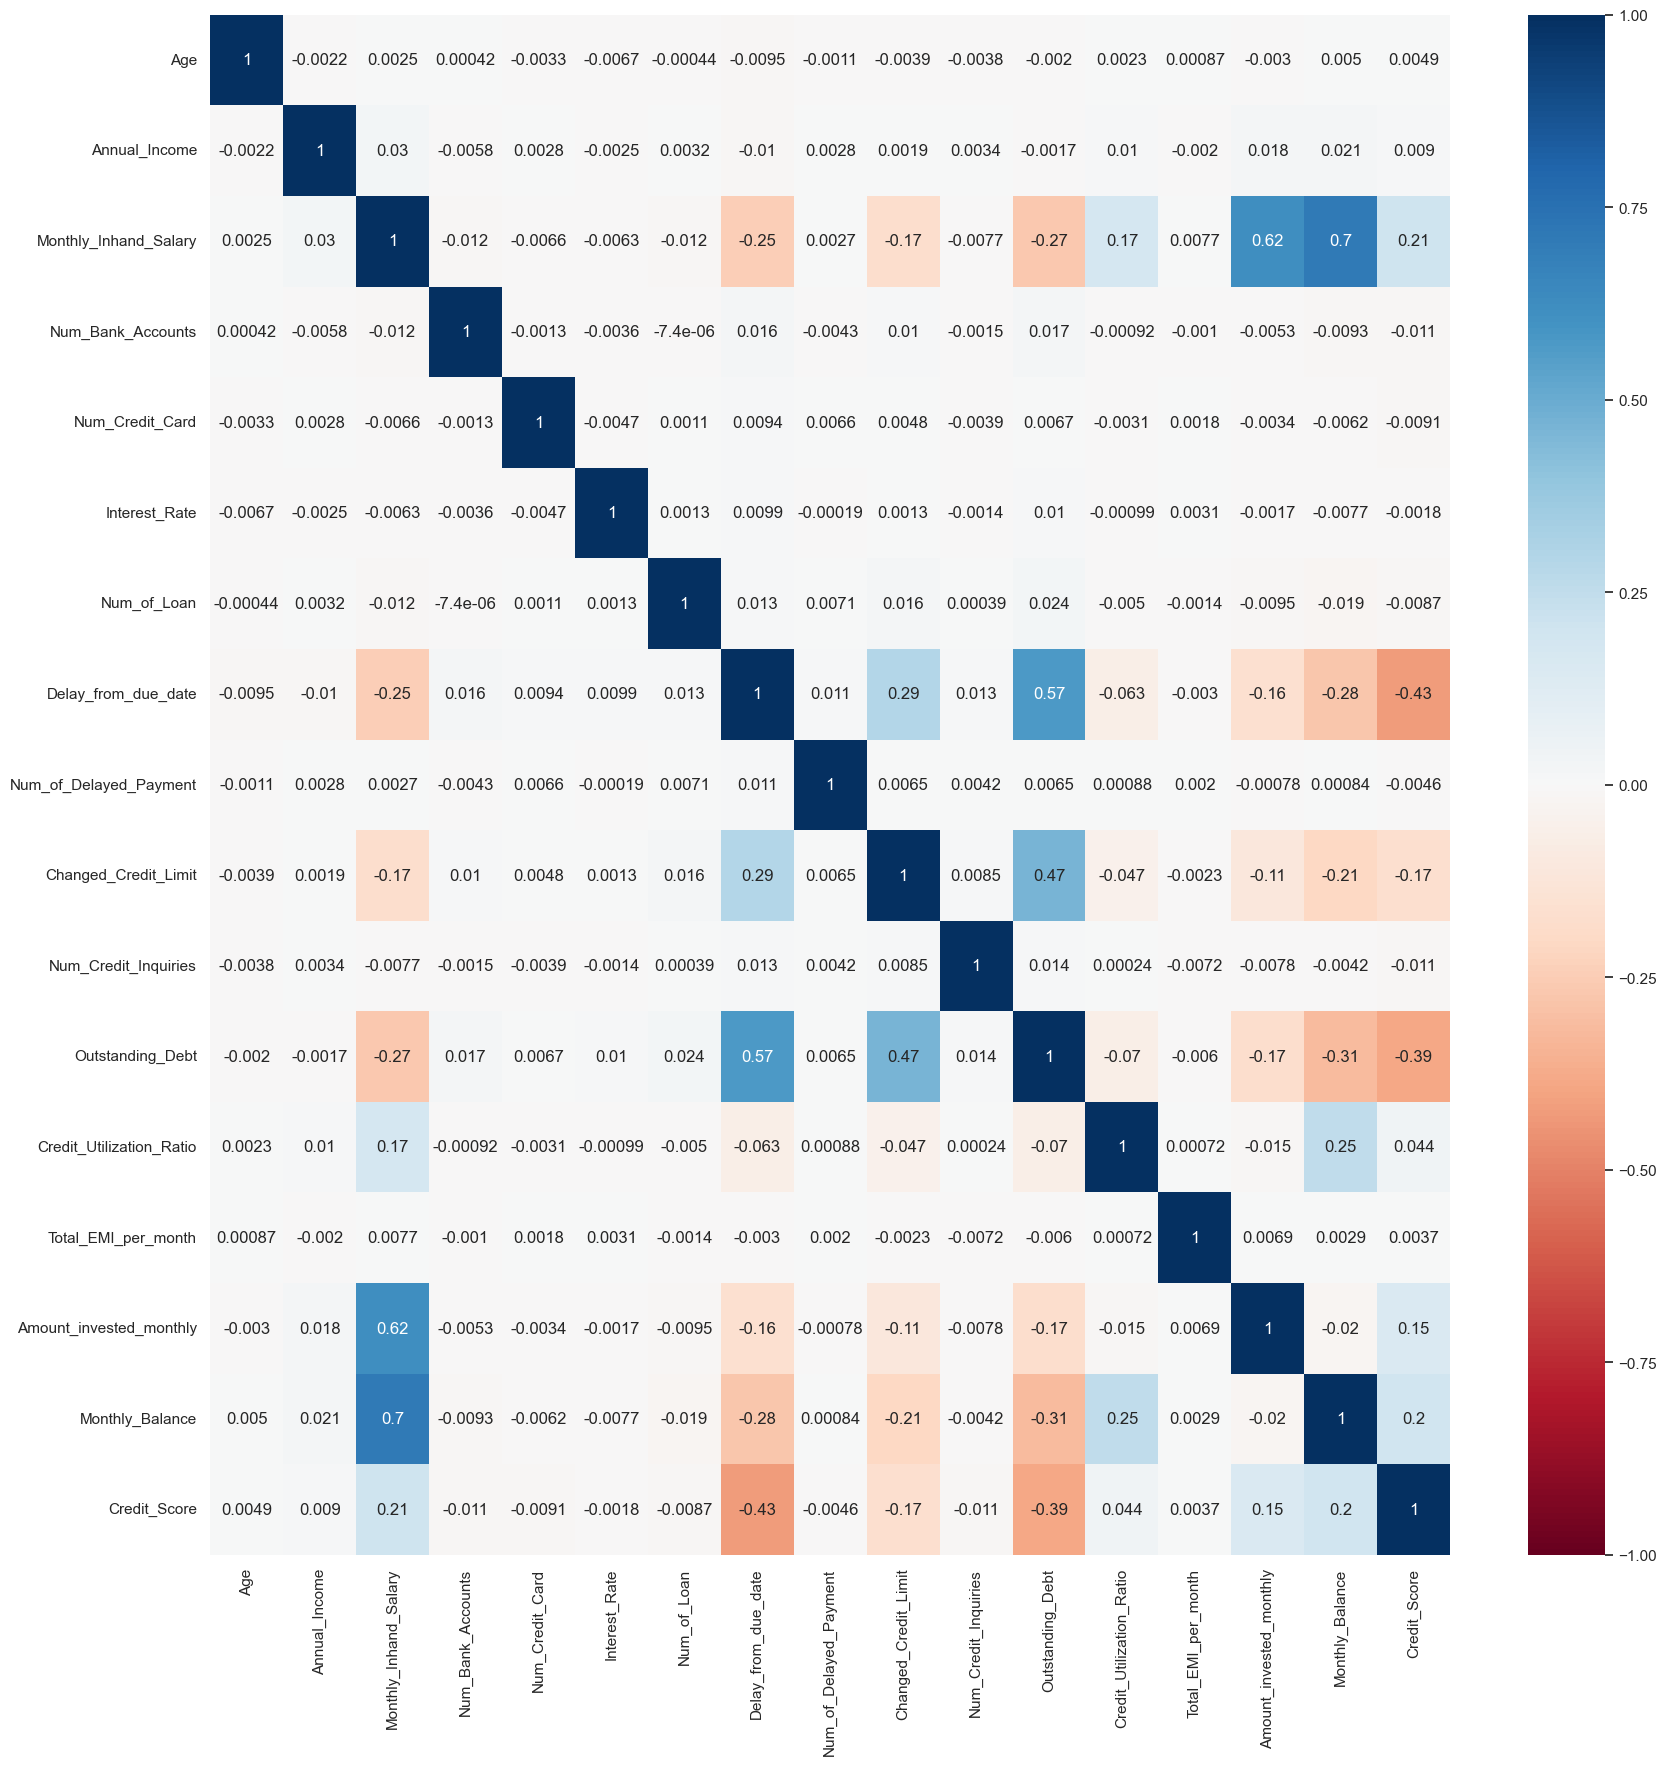

In [5]:
#columns to drop
drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour']

#columns to clean
clean = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

#clean columns
for item in clean:
    train[item] = (train[item].astype(str)).str.extract(r'^((?:\d*\.\d+|\d+)$)', expand=False).astype(float)

#map credit scores to number
creditScoreMap = {'Poor': 1, 'Standard': 2, 'Good': 3}
train['Credit_Score'] = train['Credit_Score'].replace(creditScoreMap)

# for item in clean:
#     print(train[item])

#copy data and drop non-numeric columns
data = train.copy().drop(columns=drop)

#plot heatmap
plt.figure(figsize = (20,20))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')






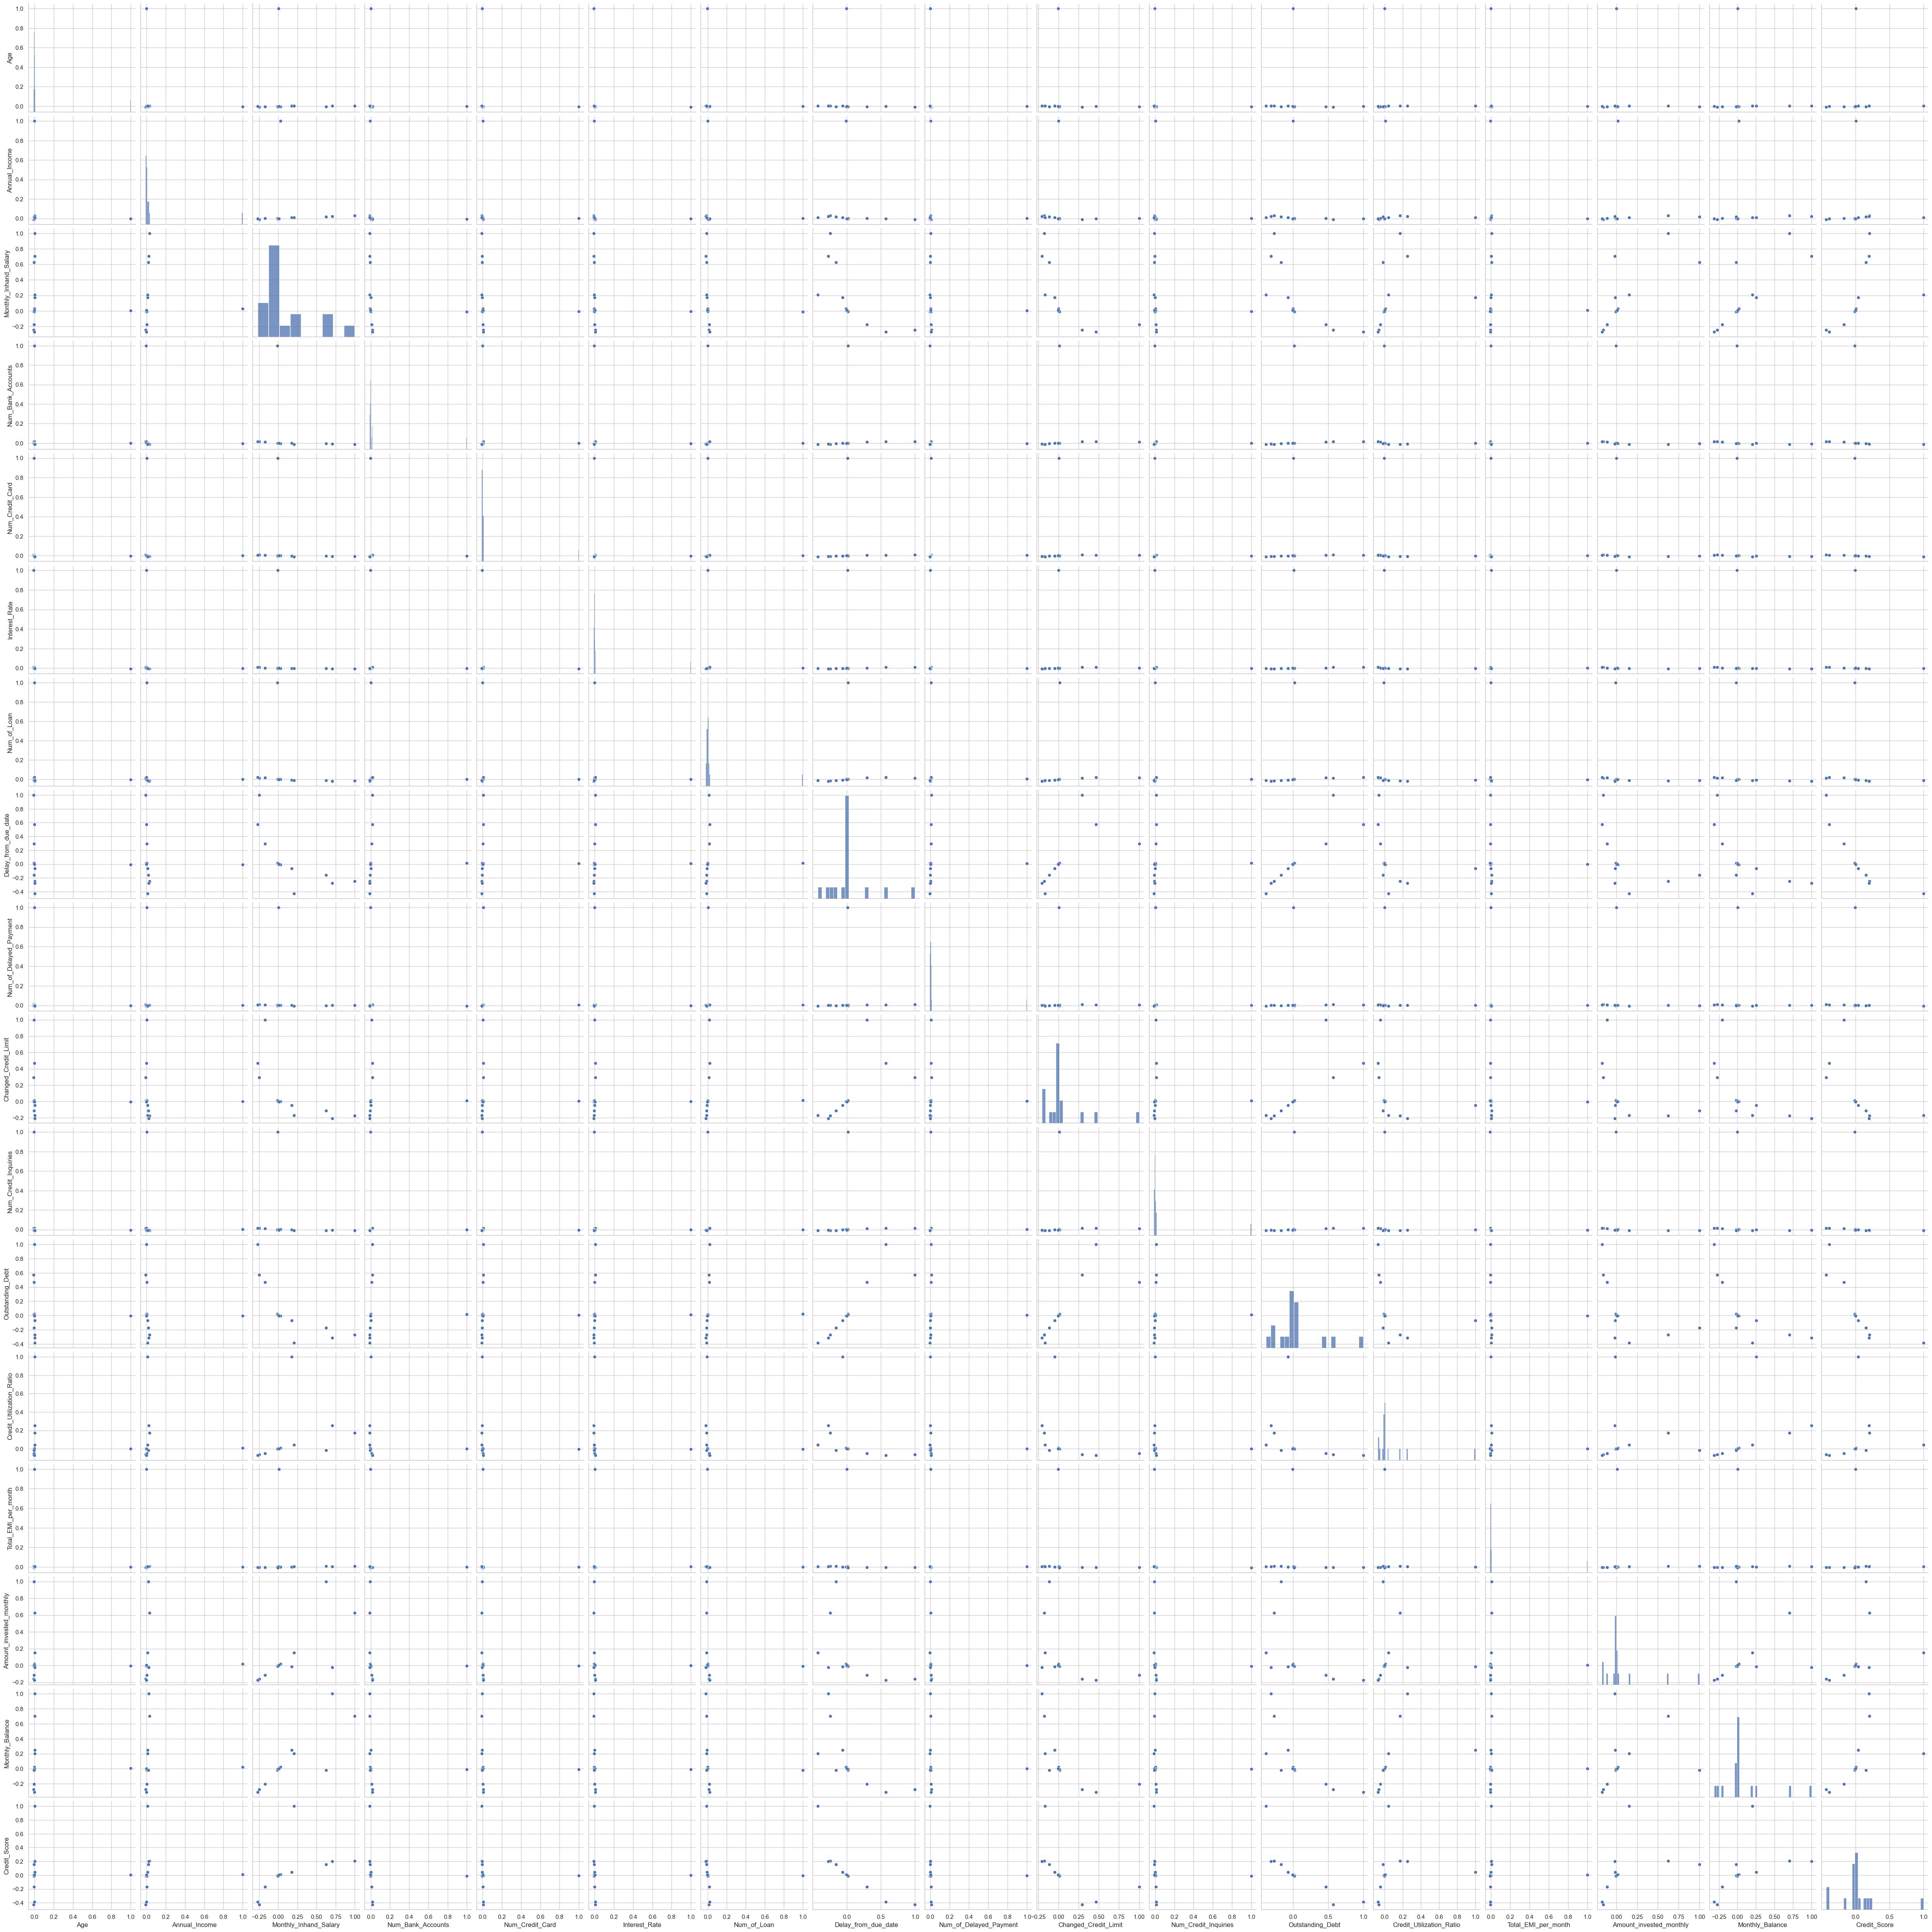

In [4]:
# pairplot
sns.set_style("whitegrid")
sns.pairplot(data, height=3)